**Update on saving as PDF** The easiest way to convert the Notebook file to a PDF file is to choose $\textbf{File $\rightarrow$ Export Notebook as $\rightarrow$ HTML}$ from the toolbar at the top left of Jupyter-lab (not your browser). Then open that file in your browser and use your browser's file menu to $\textbf{File $\rightarrow$ Print $\rightarrow$ Save as PDF}$. Upload the PDF to Quercus.

# Lab 2: Recursion equations and differential equations

## 1. Recursion equations

### 1.1 Exponential growth in discrete time

A simple way to write the recursion equation for exponential growth, $n(t) = n(t-1) R$, is to define a function that gives the initial population size, $n_0$ when $t=0$ and otherwise gives the population size at the previous time, $n(t-1)$, multiplied by the growth rate, $R$. 

In [1]:
n0, R = var('n0, R')
def n(t):
    if t == 0:
        return n0 #initial condition (population size of n0 at time 0)
    else:
        return n(t-1) * R #recursion (multiply the previous population size by R)

So then if we wanted the population size at time $t=5$, with initial population size $n_0=1$ and growth rate $R=2$, we could evaluate

In [2]:
n(5).subs(n0=1, R=2)

32

Note that this is not always the smartest way to write a recursion. This is because everytime we evaluate $n(t)$ at some time $t$ we first calculate $n(0)$, then $n(1)$, then $n(2)$, ... until we get to $n(t)$. So if we wanted to plot $n(t)$ as a function of $t$, we'd do this recursion down to $t=0$ for every value of $t$! 

### 1.2 Functions vs generators

We might therefore rather define a "function" that will store the current value of the function and easily give the next. Below is one

In [3]:
def n(t0, n0, R, max=Infinity):
    t = t0 #set the initial value of t
    nt = n0 #and the initial value of n(t)
    while t <= max: #and then if we've not gone too far yet
        yield nt #yield the current value of n(t)
        t += 1 #then update t (this is equivalent to t = t + 1)
        nt = nt * R #and update n(t)

This is called a "generator", and the subtle difference between a generator and a function is mostly being whether we "return" or "yield" values. The "yield" returns the value but then stops evaluating further, until the generator is called again.

So let's choose some parameter values for our generator, and assign this to an object ```nt```

In [4]:
nt = n(t0=0, n0=1, R=2, max=10)

Now we can ask what the next value of n is (this will be the initial value, $n_0$)

In [5]:
next(nt)

1

And the next

In [6]:
next(nt)

2

And so on. We can also ask for all the values in our generator by asking "for" each value "in" the generator

In [7]:
nt = n(t0=0, n0=1, R=2, max=10) #define the object nt again so that we start from the beginning
[n for n in nt]

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

For plotting, it is more convenient to make a list of pairs [t, n(t)].

In [8]:
nt = n(t0=0, n0=1, R=2, max=10) #define the object nt again so that we start from the beginning
nts = [[t,n] for t,n in enumerate(nt)] #if you're not sure what "enumerate" does, evaluate "enumerate?"

Another way to do this is to take advantage of the "next" function on the generator

In [9]:
nt = n(t0=0, n0=1, R=2, max=10) #define the object nt again so that we start from the beginning
nts = [[t, next(nt)] for t in range(0,10)] #if you're not sure what "enumerate" does, evaluate "enumerate?"

Once we have these t,n(t) pairs we can plot pretty straightforwardly

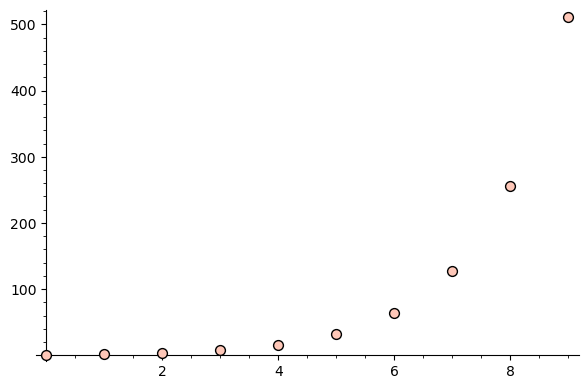

In [10]:
scatter_plot(nts)

If we wanted to compare multiple different R values we could use a ```for``` loop

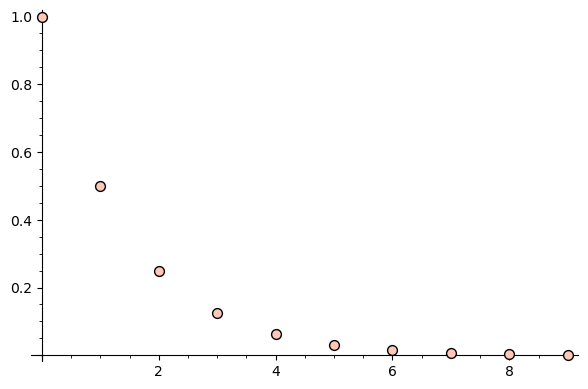

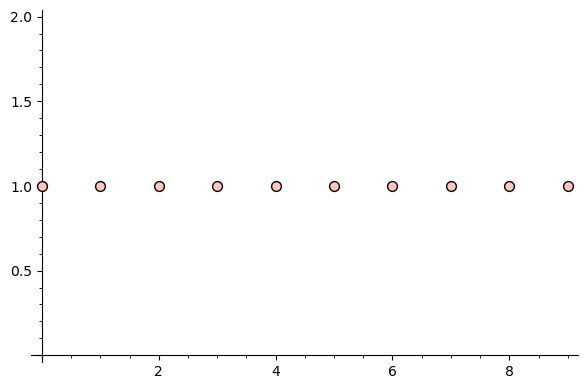

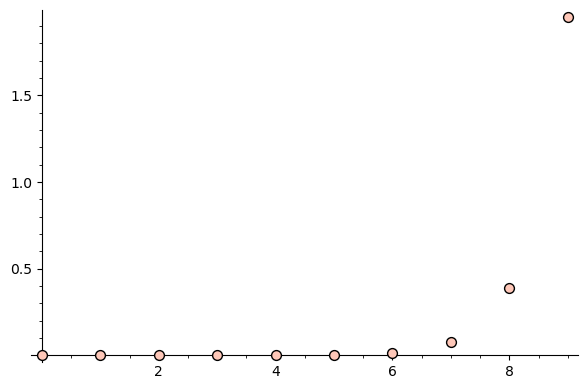

In [11]:
for R in [0.5, 1, 5]:
    nt = n(t0=0, n0=1, R=R, max=10) #define the object nt again so that we start from the beginning
    nts = [[t, next(nt)] for t in range(0,10)] #if you're not sure what "enumerate" does, evaluate "enumerate?"
    show(scatter_plot(nts))

Why does the population size decline, not change, and increase, respectively, for each of these $R$ values?

### 1.3 Logistic growth in discrete time

**Q1.** Write the recursion equation for logistic growth, $n(t) = n(t) + r n(t-1) (1 - n(t-1)/k)$, as a generator called ```n``` with parameters ```n0```, ```r```, ```k```, and ```max```

**Q2.** Set the initial population size $n(0)$ to 1, growth rate $r$ to 0.1, and carrying capacity $k$ to 100 and save this as an object ```nt```, as above

**Q3.** Make a list of the population sizes from $t=0$ to $t=100$ and call this ```ns```

**Q4.** Use ```ns``` to get the population size at $t=45$

**Q5.** Now make a list of the pair [t,n(t)] from $t=0$ to $t=100$

**Q6.** Use ```scatter_plot()``` to plot these population sizes as a function of time

**Q7.** Now plot this, separately, for $r$ values 0.1, 2.1, 2.5, 2.565, 2.7, and 3.1 (hint: use a ```for``` loop). What are you seeing?

 We can make a bifurcation diagram to see what is happening to the final population size as we increase $r$

 We can make a bifurcation diagram to see what is happening to the final population size as we increase $r$

Compare this to Figure 4.1.2 (p118) in the text.

### 1.4 Natural Selection

Let's next explore the two models of natural selection we saw in the lecture, haploid and diploid selection.

Our recursions were

$p(t+1) = \frac{V_A p(t)}{V_A p(t) + 1 - p(t)}$ (haploid selection)

$p(t+1) = \frac{V_{AA} p(t)^2 + V_{Aa} p(t)(1-p(t))}{V_{AA} p(t)^2 + V_{Aa} 2 p(t)(1-p(t)) + (1-p(t))^2}$ (diploid selection)

A generator for the haploid selection recursion is

In [20]:
def p_hap(t0, p0, VA, max=Infinity):
    t = t0 #set the initial value of t
    pt = p0 #and the initial value of p(t)
    while t <= max: #and then if we've not gone too far yet
        yield pt #yield the current value of p(t)
        t += 1 #then update t (this is equivalent to t = t + 1)
        pt = VA * pt / (VA * pt + 1  - pt) #and update p(t)

Now let's choose some parameter values, initial frequency of the A allele $p_0=0.1$ and relative viability of the A allele $V_A=1.1$, and define a generator that will give us the allele frequency from generation 0 to 100

In [28]:
pth = p_hap(t0=0,p0=0.1,VA=1.1,max=100)

And now let's make the [t,p(t)] pairs, to get ready for plotting

In [30]:
pths = [[t, next(pth)] for t in range(0,100)]

And plot

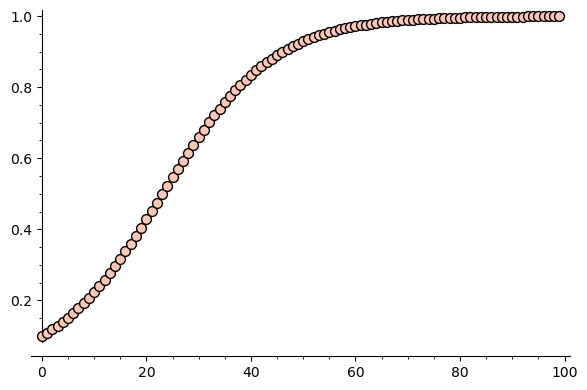

In [31]:
scatter_plot(pths)

**Q8** Now define a generator for the diploid selection recursion

**Q9** Now define a generator with specific parameter values, $p_0 = 0.1$, $V_{AA} = 1.1$, and $V_{Aa} = 1$, that goes from time 0 to 200

**Q10** Make the [t,n(t)] pairs

**Q11** And plot

**Q12** Explain in words why it takes longer for the allele frequency to increase in the diploid model vs the haploid model with these parameter values

## 2. Differential equations

Differential equations lend themselves less to direct simulation since they are the limit of the recursion equation as the time step goes to 0. However, we could generalize our approach above to update the population size over any increment of time. For example, below we update population size under exponential growth in increments of ```dt```

In [42]:
def n(dt, n0, R, max=Infinity):
    t = 0 #set the initial value of t
    nt = n0 #and the initial value of n(t)
    while t <= max: #and then if we've not gone too far yet
        yield t, nt #yield the current value of n(t)
        t += dt #then update t (this is equivalent to t = t + dt)
        nt += nt * R * dt #and update n(t)

Now we can compare the values we get for small values of ```dt``` (say 0.01) to the discrete case above (```dt```=1)

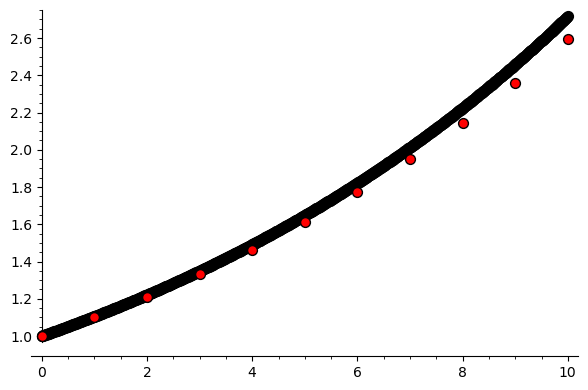

In [43]:
nt = n(0.01, 1, 0.1, max=10) #small dt=0.01, approximating continuous time
nts_c = [[t,n] for t,n in nt]

nt = n(1, 1, 0.1, max=10) #dt=1, discrete time
nts_d = [[t,n] for t,n in nt]

show(
    scatter_plot(nts_c, facecolor='k') + #continuous in black
    scatter_plot(nts_d, facecolor='r') #discrete in red
)

SageMath also has the ability to solve differential equations, but we won't spend much time on this as we will be able to do this for very few models

Here is how it works for the logistic equation

In [44]:
r,k,t,n0 = var('r, k, t, n0') #define the variables
n = function('n')(t) #define a general function

f = desolve(
    diff(n(t),t) == r * n(t) * (1 - n(t) / k), #the differential equation we want to solve
    n(t), #the function we want to solve for
    ivar = t, #the independent variable we want the function to be of
    ics = [0, n0] #the initial conditions (t0, n0)
)
show(f)

-(log(-k + n(t)) - log(n(t)))/r == (r*t - log(-k + n0) + log(n0))/r

This spits out an "implicit" solution for $n(t)$, and we'd have to do some further manipulting to get the explicit expression.

**Q13.** Solve the differential equation for continuous-time exponential growth, $dn/dt = r n$, with ```desolve```.

If you have time, try plotting this function (hint, just use the ```plot``` function, rather than ```scatter_plot```, to plot a continuous function, as shown in lab01)

**Q14** Solve the differential equation for the change in allele frequency under haploid selection, $dp/dt = s p (1-p)$

**Q15** Compare to the solution for logistic growth above. What values of $k$ and $r$ make the dynamics of $n$ and $p$ equivalent?